##### MATH5271 Environmental Data Science and Statistics



## Week 5: Principal Component Analysis

##### Welcome to Week 5 of MATH5271. In this session we will explore Principal Component Analysis. By the end of this session you should understand:

- Basic aspects of multi-variable data;
- How to represent multivariable data with an ordered set of Principal Components;
- The concepts of supervised and unsupervised statistical learning;
- Various applications of PC/EOF approaches in Environemntal Data Sciences.


## 1. Setup and Load Data

Before we get started analysing some data we need to ensure we have the appropriate 'libraries' installed. You can think of these as opening a box of available tools. The .csv files we upload will be uploaded into a 'pandas' data frame. We will use the 'numpy' (numerical python) packkage to do some basic maths with the data and Matplotlib's 'pyplot' package to make some pretty graphs. 

In this lab we will also use xarray which is an extremely powerful and user frieldly tool for analysis of large multi-dimensional data sets. Here is a more in depth [tutorial](http://gallery.pangeo.io/repos/pangeo-data/pangeo-tutorial-gallery/xarray.html) just on xarray that I have built the second half of this lab from.

There are many other packages and libraries avaialble freely in python. We will experiment with a few in this course but will only really scratch the surface. I will try to keep things as simple as possible so we can focus on understanding - rather than trouble shooting technical issues.

In [181]:
# import libraries
import pandas as pd

# Numerics
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# plot figures in Colaboratory notebook
%matplotlib inline

I have copied the data table 9.6 from Wilks into a csv file and am storing these on github.

We will load the data table as a pandas 'DataFrame'. This is a 2-dimensional data structure that can store data of different types and has inbuilt operations (like calcualting statistics and doing basic plots). 

In [182]:
# Define the URL where the data set is stored
TableA1_url = 'https://raw.githubusercontent.com/janzika/MATH5271/main/Wilks_TableA1.csv' 

# Import the data set as a Pandas Dataframe using the 'read_csv' function
df = pd.read_csv(TableA1_url)

## Multi-variate data analysis

Consider a data set ($X$), with $K$ anomaly variables (${\bf x }_{k}$) each with $n$ observations (for example over time; $x_{tk}$). That is  

$$X = \begin{bmatrix}\bf{x}_{1} & \bf{x}_{2} & ... & \bf{x}_{K}
\end{bmatrix}=\begin{bmatrix}x_{11} & x_{12} &  ... & x_{1K}\\
x_{21} & x_{22} &  ... & x_{2K}\\
... & ... & ... & ...\\
x_{n1} & x_{n2} &  ... & x_{nK}
\end{bmatrix}.
$$

For example, ${\bf x }_{k}$ could be meteorological observations of different variables (with their mean subtracted) and $t$ (with $1\leq t\leq n$) could distinguish the time in days, hours or second at which the observations were made. 

For example let $x_{t1}$ be the Ithaca and $x_{t2}$ Canandaigua minimum temperature on day $t$ (here $K$=2 and $n$=31).

Text(0, 0.5, 'Canandaigua min. temp. anomaly ($x_2$, $^{\\circ}$F)')

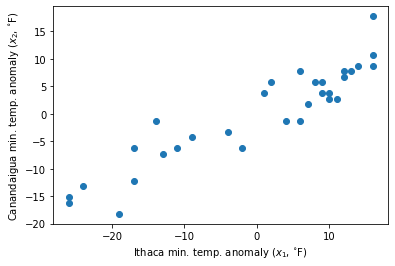

In [183]:
idf = df[df['Location'].isin(['Ithaca'])]
cdf = df[df['Location'].isin(['Canandaigua'])]
x1 = idf.MinTemp_Far-idf.MinTemp_Far.mean() ; 
x2 = cdf.MinTemp_Far.values-cdf.MinTemp_Far.mean()

plt.scatter(x1,x2)
plt.xlabel('Ithaca min. temp. anomaly ($x_1$, $^{\circ}$F)')
plt.ylabel('Canandaigua min. temp. anomaly ($x_2$, $^{\circ}$F)')

## Multi-variate normal (MVN) distrbution

Just as it is common to characterise 1D data using the normal distribution, a common way of chatracterising multivariate data is as a multivariate normal distribution (MVN). Consider the case for 2D data where the two variables are uncorrelated (i.e. one variable being large/small has no bearing on the other). In this case the distirbution is proportional to the product of the two 1D normal distributions ($f_N$) such that

$$f(x_1,x_2) = f_N(x_1)*f_N(x_2) = \frac{1}{2\sigma_1\sigma_2\pi}\exp^{-\frac{1}{2}\left[\left(\frac{x_1}{\sigma_1}\right)^2 + \left(\frac{x_2}{\sigma_2}\right)^2\right]}\,$$

where $\sigma$ is the standard deviation.

Text(0, 0.5, 'Canandaigua min. temp. ($x_2$, $^{\\circ}$F)')

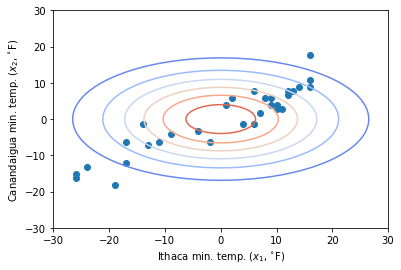

In [190]:
# Standard deviation of data
sig1 = x1.std(); sig2 = x2.std()
# Create mesh for 2D MVN
xx1 = np.linspace(-30, 30, 100)
xx2 = np.linspace(-30, 30, 100)
X1, X2 = np.meshgrid(xx1,xx2)
Z = np.exp(-0.5*(((X1)/sig1)**2 + ((X2)/sig2)**2))
# Plot
plt.contour(X1, X2, Z, cmap=cm.coolwarm)
plt.scatter(x1,x2)
plt.xlabel('Ithaca min. temp. ($x_1$, $^{\circ}$F)')
plt.ylabel('Canandaigua min. temp. ($x_2$, $^{\circ}$F)')

## Multi-variate normal (MVN) distrbution

The issue with the previous example is that the data is correlated, so a 3rd parameter is included to help capture the distribution more accurately: the covariance

$$ s_{12} = \frac{1}{n-1}\sum_{t=1}^n x_{t1}\, x_{t2}.$$

Converting the covariance to a correlation via $r_{12} =  \frac{s_{12}}{\sigma_{1} \sigma_{2}}$ the MVN becomes

$$f_{MVN}(x_1,x_2) = 
\frac{1}{2\pi\sigma_1\sigma_2\sqrt{1-r_{12}^2}}
\exp^{\frac{-1}{2(1-r_{12}^2)}
\left[
\left(\frac{x_1}{\sigma_1}\right)^2 
+ \left(\frac{x_2}{\sigma_2}\right)^2 
- 2r_{12}\left(\frac{x_1}{\sigma_1}\right)\left(\frac{x_2}{\sigma_2}\right) 
\right]}.$$

Text(0, 0.5, 'Canandaigua min. temp. anomaly ($x_2$, $^{\\circ}$F)')

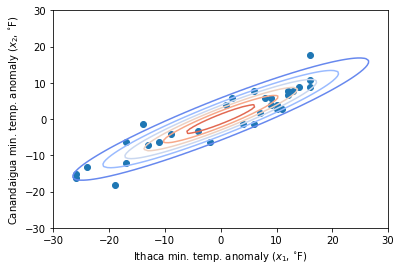

In [191]:
n=idf.shape[0]
COV = (1/(n-1))*np.sum((x1)*(x2))
r12 = COV/(sig1*sig2)
Z = np.exp(-(1/(2*(1-r12**2)))*(((X1)/sig1)**2 + \
    ((X2)/sig2)**2 - \
    2*r12*((X1)/sig1)*((X2)/sig2)))
# Plot
plt.contour(X1, X2, Z, cmap=cm.coolwarm)
plt.scatter(x1,x2)
plt.xlabel('Ithaca min. temp. anomaly ($x_1$, $^{\circ}$F)')
plt.ylabel('Canandaigua min. temp. anomaly ($x_2$, $^{\circ}$F)')

## Data Compression Hypothetical:

It's the year 2030 and an unforseen crisis has severely limited digital data storage. You and Daniel Wilks would like to preserve both the Ithaca and Canandaigua temperature records but you only have enough disk space to store one time series. What do you do? 

You have enough disk space for an equation and few coefficients too if you need.

## Rotating the reference frame

Since $x_1$ and $x_2$ covary so much we can rotate the reference frame to form a new variable $u_1$, oriented along the doninant axis of variation. We are looking for 

$${\bf u}_1 = {\bf{x}}_{1}e_{11}+{\bf{x}}_2e_{21}$$

Such that $e_{11}^2+e_{21}^2=1$.

In [186]:
# Create 100 angles from 0 to pi
theta = np.arange(0,np.pi,np.pi/100) 
u_var = np.zeros_like(theta) # Pre allocate variances
#Loop through each of the angles and store the variance for each
for i in np.arange(0,theta.shape[0]):
  u1 = np.cos(theta[i])*(x1-x1bar)+np.sin(theta[i])*(x2-x2bar)
  u_var[i] = np.var(u1)
#Identify the maximum
maxvar = np.max(u_var)
theta_u1 = theta[np.where(u_var==maxvar)].squeeze()

e11= 0.8443279255020151 , e21= 0.5358267949789967


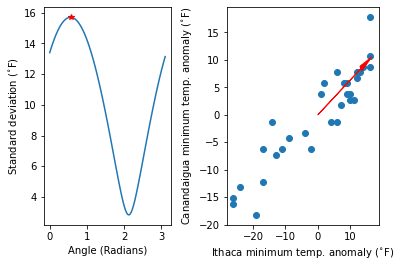

In [187]:
#Plot the varince as a function of angle and the max direction
plt.subplot(1,5,(1,2))
plt.plot(theta,np.sqrt(u_var)); plt.plot(theta_u1,np.sqrt(maxvar),'r*')
plt.xlabel('Angle (Radians)'); plt.ylabel('Standard deviation ($^{\circ}$F)')

plt.subplot(1,2,2)
plt.scatter(x1,x2)
plt.arrow(0,0,np.cos(theta_u1)*np.sqrt(maxvar),\
          np.sin(theta_u1)*np.sqrt(maxvar),\
          head_width=1,head_length=4, fc='r', ec='r')
plt.xlabel('Ithaca minimum temp. anomaly ($^{\circ}$F)')
plt.ylabel('Canandaigua minimum temp. anomaly ($^{\circ}$F)')
print('e11=',np.cos(theta_u1),', e21=',np.sin(theta_u1))

## Covariance Matrix

Instead of rotating through every possible angle, we can find the direction of greatest variance from the *covariance matrix*:

$$S = \begin{bmatrix}s_{11} & s_{12}\\
s_{21} & s_{22}
\end{bmatrix}.
$$

Where $s_{ij}$ is defined above. The 1st *eigenvector* of $S$ is then

$${\bf e}_1 = [e_{11}, e_{12}]^T$$

and the first *eigenvalue*, $\lambda_1$ is the variance of that dominant component.

## Eigenvectors and Eigenvalues

If you never got the 'point' of eigenvectors and eigenvalues now is the time!

Recall that the eigenvalues ($\lambda$) of  the  matrix A satisfy
$$A = I\lambda  $$ 
where $I$ is the identity matrix and the eigenvectors ($\bf e$) satisfy
$$ A {\bf e} = \lambda {\bf e}.  $$


## Eigenvectors and Eigenvalues Example

Consider a MVN distribution with 

$$S = \begin{bmatrix}1 & 3/5\\
3/5 & 2
\end{bmatrix}.
$$

What are $\lambda$ and $\bf e$?

Our matrix, $S$ for Ithaca and Canandaigua, is empirical so we can't compute the eigenvectors easily by hand. Lets use numpy's linear algebra package instead.

In [188]:
# Compute the 2x2 covariance matrix
S = [[ (1/(n-1))*np.sum((x1)**2) , (1/(n-1))*np.sum((x1)*(x2)) ],\
     [ (1/(n-1))*np.sum((x1)*(x2)) , (1/(n-1))*np.sum((x2)**2)]] 
#Use numpy linalg.eig to determine eigenvalues and eigenvectors.
lam, E = np.linalg.eig(S)
print('std of max u1 =', np.sqrt(lam[0]))
print('e11 =',E[0][0],', e12 =',E[1][0])

std of max u1 = 15.961112964119252
e11 = 0.847859124540667 , e12 = 0.5302215621163795


## 1st Principal Component

$u_1$ is the 1st principal component. It represents the best compression of the two time series data into one single time series.

The 2nd principal component $u_2$ is the projection of the data into the perpendicular direction to $u_1$ (in $[x_1, x_2]$ space) and has the smallest variance.

We can re-create the original time series using 

$${\bf x }_1 =  e_{11}{\bf{u}}_{1}+e_{12}{\bf{u}}_2$$

or, if only the 1st component is available

$${\bf{x}}_1 \approx  {\bf{u}}_{1}e_{11}.$$ 

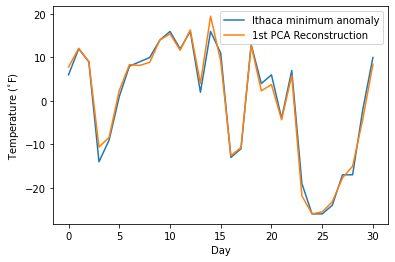

In [189]:
u1 = E[0][0]*x1+E[1][0]*x2
x1approx = E[0][0]*u1
plt.plot(x1,label='Ithaca minimum anomaly')
plt.plot(x1approx,label='1st PCA Reconstruction')
plt.ylabel('Temperature ($^{\circ}$F)')
plt.xlabel('Day');plt.legend()

## General Multivariate Normal Distribution (MVN)

For the general case of a data set, $X$, with $K$ variables the Covariance Matrix is 

$$S = \begin{bmatrix}s_{11} & s_{12} & ... & s_{1K}\\
s_{21} & s_{22} & ... & s_{2K}\\
... & ... & ... & ...\\
s_{K1} & s_{K2} & ... & s_{KK}
\end{bmatrix}.
$$

and the MVN is represented by

$$f_{MVN}({X}) = 
\frac{1}{(2\pi)^{K/2}\sqrt{det[S]}}
\exp{
\left[
-\frac{1}{2}{X}^T[S]^{-1}{X}
\right]}.
$$

Notice that if all the variables were independent ($s_{jk}=0$ for $j\neq k$) then $S$ would be diagonal and 
$$f_{MVN} = f(x_1)f(x_2)...f(x_K).$$

## Principal Components

In general any anomaly data set, $X$, can be represented as a set of principal components $u_m$ (1$\leq m \leq k$) with

$${\bf{u}}_m ={\bf e}_{m}^{T}{\bf x} = \sum_{k=1}^K e_{k,m}{x}_k$$

where ${\bf e}_{m}$ are the eaigenvectors of the covariance matrix $S$. 

Likewise the data can be reproduced with

$${\bf{x}}_k = \sum_{k=1}^K e_{k,m}{u}_m \approx \sum_{k=1}^M e_{k,m}{u}_m.$$





## Orthogonality

Much like in frequency domain analysis, we are projecting the data $\bf x$ into a set of orthogonal basis functions defined by $\bf e$.

How is frequency domain analysis otherwise different/similar to PCA?

## When to use correlation instead of covariance?

The terms in thecovariance matrix $S$ are given by

$$ s_{k,l} = = \frac{1}{n-1}\sum_{t=1}^n x_{i,k} x_{i,l}.$$

An alternative is to replace $S$ with the correlation matrix $R$ with terms

$$ r_{k,l} = \frac{s_{k,l}}{\sqrt{s_{k,k}\,s_{l,l}}}.$$

What would be the effect of this?

Think of examples (ideally beyond those provided by Wilks) where $R$ or $S$ would be preferable. 

## PCA vs Linear Regression

In week 2 we developed a linear regression based model for Canandaigua temperature based on the temperature at Ithaca.

Presented in terms of anomalies, our linear regression model is simply

$${\bf x}_2 = b {\bf x}_1 +{\bf \epsilon}$$

How does this differ from the exercise of reproducing ${\bf x}_2$ from the first principle component?

Which approach would have a smaller error?



## Supervised vs Unsupervised Learning

"For each observation of the predictor measurement(s) $x_i$, $i = 1,...,n$ there is an associated response measurement $y_i$. [In supervised learning] We wish to fit a model that relates the response to the predictors, with the aim of accurately predicting the response for future observations (prediction) or better understanding the relationship between the response and the predictors (inference)...

In contrast, unsupervised learning describes the somewhat more challenging situation in which for every observation $i = 1,...,n$, we observe a vector of measurements $x_i$ but no associated response $y_i$. It is not possible to fit a linear regression model, since there is no response variable to predict. In this setting, we are in some sense working blind; the situation is referred to as unsupervised because we lack a response variable that can supervise our analysis."

From *James, Witten, Hastie and Tibshirani (2017): An Introduction to Statistical Learning with Applications in R*

<div>
<img src=https://github.com/janzika/MATH5271/raw/main/Lecture%205/PCAexamples.png width="500"/>
</div>

<div>
<img src=https://github.com/janzika/MATH5271/raw/main/Lecture%205/PCAcaution.png width="500"/>
</div>

# Summary

- Principal Component Analysis involves taking multivariate data and reprojecting it PCs ordered from most to least important; 
- PCA is an efficient form of data compression and is an *unsupervised* learning technique since PCs are not prescribed *a* *priori*;
- PCs (otherwise known as Empirical Orthoginal Functions) are a mainstay of geoscience - but they should be interpreted with caution.